In this benchmark, we try to achieve the highest throughput (MB/s) while reading a single ROOT file.

In [1]:
import os, sys
sys.path.append(os.getcwd()+"/../")
sys.path.append(os.getcwd()+"/../src")
from scenarios.generator_2p1 import generate_configs
from src.benchmark import Benchmark, run_benchmark

In [2]:
# warning: all YAML files will be deleted fron this directory before proceeding
config_path = "./configs_2.1"

generate_configs(config_path)
report = run_benchmark(config_path)

Directory ./configs_2.1 already exists, will clean all YAML files from it.
Saved 6 config files to ./configs_2.1


 17%|█▋        | 1/6 [00:22<01:53, 22.66s/it]/depot/cms/kernels/python3/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35581 instead
  warnings.warn(
 50%|█████     | 3/6 [01:13<01:08, 22.93s/it]/depot/cms/kernels/python3/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45511 instead
  warnings.warn(
 67%|██████▋   | 4/6 [02:37<01:34, 47.12s/it]2024-03-28 16:15:45,188 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-03-28 16:15:46,080 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-03-28 16:15:48,190 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
 83%|████████▎ 

In [3]:
report

,n_files,n_columns_read,n_events,loaded_columns,worker_operation_time,executor,n_workers,compressed_bytes,uncompressed_bytes,run_processor,run,column_setup
0,1,50,154321550,True,0,dask-local,4,265594188,1129031467,19.436925,20.763812,muons_only
1,1,50,154321550,True,0,dask-local,2,265594188,1129031467,36.557856,37.909583,muons_only
2,1,20,61728620,True,0,dask-local,4,175488912,521753090,8.892793,10.466951,hmm_columns
3,1,233,719138423,True,0,dask-local,4,1152109223,5636057591,81.699052,83.085135,main_collections
4,1,233,719138423,True,0,dask-local,2,1152109223,5636057591,159.729559,161.101451,main_collections
5,1,20,61728620,True,0,dask-local,2,175488912,521753090,16.674703,18.145440,hmm_columns


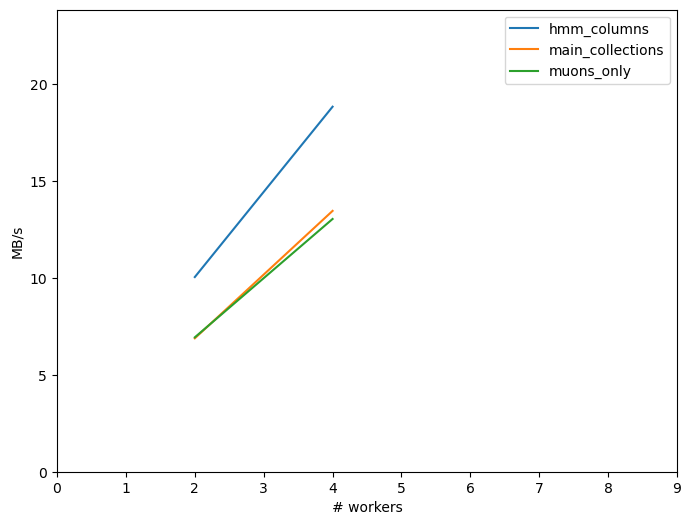

In [5]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.run_processor/(1024*1024)

report_by_column_setup = report.groupby('column_setup')

plt.figure(figsize=(8, 6))
for col_setup, group in report_by_column_setup:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=col_setup)

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()